In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sympy import * 


In [3]:
dado1 = np.arange(1,7)
dado2 = np.arange(1,7)

df = pd.DataFrame(index=np.arange(1,7),columns=["Dado1","Dado2","Probabilidad","Ganancia"],dtype=float)
df.index.name = "Evento"
df["Dado1"] = dado1
df["Dado2"] = dado2
df["Ganancia"] = dado1*dado2*100
df["Probabilidad"] = 1/36
df

,Dado1,Dado2,Probabilidad,Ganancia
Evento,,,,
1,1,1,0.027778,100
2,2,2,0.027778,400
3,3,3,0.027778,900
4,4,4,0.027778,1600
5,5,5,0.027778,2500
6,6,6,0.027778,3600


In [4]:
# Probabilidad de ganar y la ganancia max seria 3600
df.Probabilidad.sum()

0.16666666666666669

In [5]:
# Probabilidad de perder y por cada vez que pierdo son 200
1-df.Probabilidad.sum()

0.8333333333333333

In [6]:
# Si juego este juego en ocasiones repetidas yo espero ganar
sum(df["Probabilidad"]*df["Ganancia"])+ (1-df.Probabilidad.sum())*-200

86.111111111111114

## Con simulacion

In [7]:
Ganancia = 0

In [8]:
Dado1 = 6
Dado2 = 6

if Dado1 == Dado2:
    Ganancia += 100 *(Dado1*Dado2)
else:
    Ganancia -=200
Ganancia

3600

In [9]:
Ganancia = Ganancia - 200

## Monte Carlo

In [27]:
def Juego1(Dado1,Dado2):
    if Dado1 == Dado2:
        return 100 * (Dado1*Dado2)
    else:
        return -200
    
Dado1 = np.random.randint(1,7)
Dado2 = np.random.randint(1,7)
Juego1(Dado1,Dado2)

3600

140.0


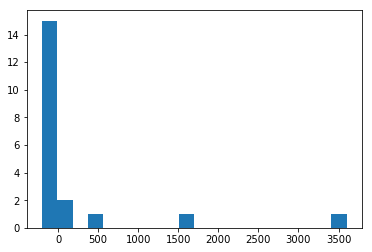

In [29]:
N = 20
SimularJuego1 = np.zeros(N)

for i,j in enumerate (SimularJuego1):
    Dado1 = np.random.randint(1,7)
    Dado2 = np.random.randint(1,7)
    SimularJuego1[i] = Juego1(Dado1,Dado2)
    
plt.hist(SimularJuego1,bins=20)
print(np.mean(SimularJuego1))

## Mejorando el código

In [30]:
np.where(np.array([1,5,7,4,6])>5,1,0)

array([0, 0, 1, 0, 1])

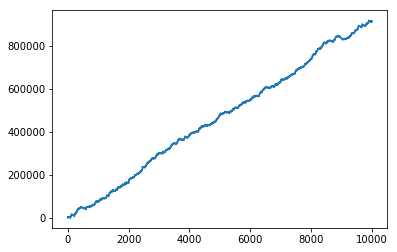

In [31]:
N = 10000
win = 100
lose = -200

Dados = np.random.randint(1,7,[N,2])
jugador1 = np.where(Dados[:,0] == Dados[:,1],Dados[:,0]*Dados[:,1]*win,lose)
plt.plot(np.cumsum(jugador1))